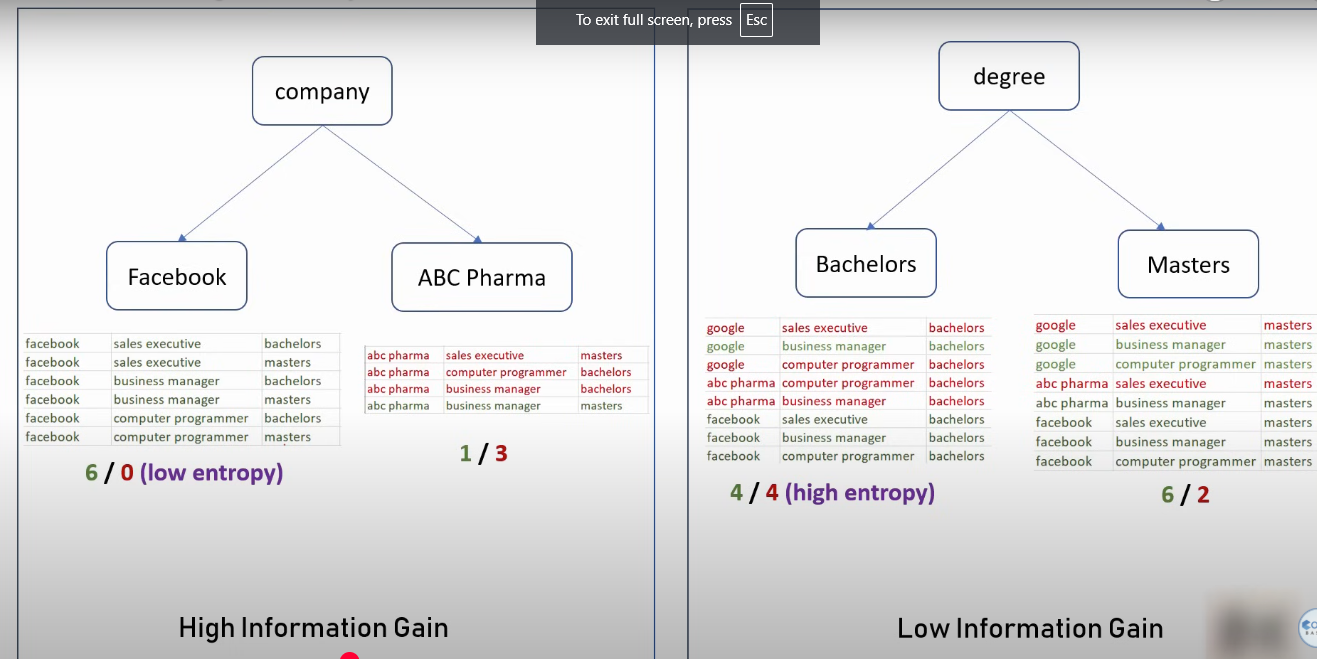

## NOTE: Always choose High Entropy gain (Entropy means randomness)

In [2]:
import pandas as pd

In [9]:
df=pd.read_csv('salaries.csv')
df

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,masters,1
6,abc pharma,sales executive,masters,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,masters,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   company                16 non-null     object
 1   job                    16 non-null     object
 2   degree                 16 non-null     object
 3   salary_more_then_100k  16 non-null     int64 
dtypes: int64(1), object(3)
memory usage: 644.0+ bytes


In [11]:
inputs=df.drop('salary_more_then_100k',axis='columns') #drop salary_more_then_100k column (independet  variable)
target=df['salary_more_then_100k'] #dependent variable

In [7]:
inputs

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [12]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [14]:
from sklearn.preprocessing import LabelEncoder
#machine learning only words on numbers not on labels so we need to convert in in number


In [15]:
le_company=LabelEncoder() # this means creating obje4ct of LabelEncoder we have 3 columns so creating 3 objects
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [16]:
inputs['company_n']=le_company.fit_transform(inputs['company']) #transform company column to numerical values and create extra column
inputs['job_n']=le_job.fit_transform(inputs['job']) #transform job column to numerical values 
inputs['degree_n']=le_degree.fit_transform(inputs['degree']) #transform degree column to numerical values
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [17]:
inputs_n=inputs.drop(['company','job','degree'],axis='columns') #drop company,job,degree columns
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [19]:
from sklearn import tree #for decision tree we import tree from sklearn

In [20]:
model=tree.DecisionTreeClassifier()

In [21]:
model.fit(inputs_n,target)

DecisionTreeClassifier()

In [19]:
model.score(inputs_n,target)

1.0

In [24]:
model.predict([[2,1,0]]) #google, sales executive, bachelors 
#here 0 means the person working in google, whose position is sales executive and who has done Bachelor salary is not more than 100k

C:\Users\atulm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [21]:
model.predict([[2,0,1]]) #google, business manager, masters

C:\Users\atulm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

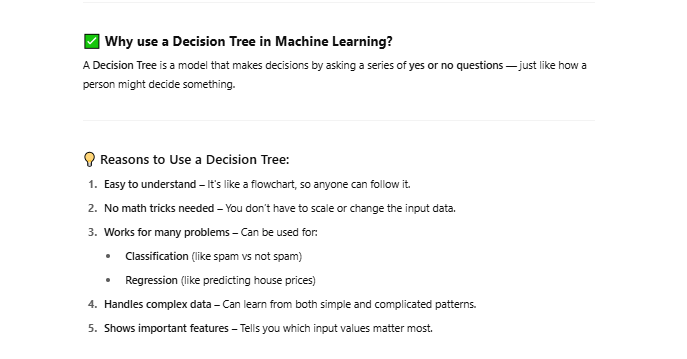
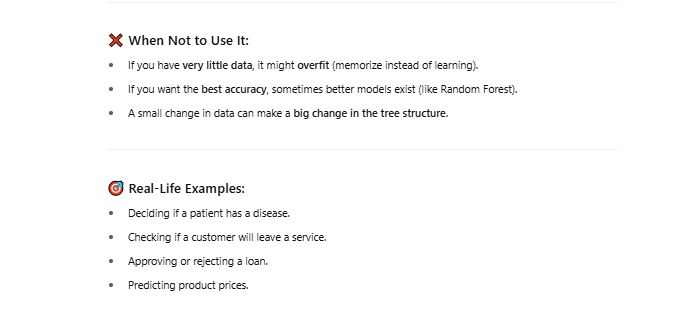